# Rare Labels

## Labels that occur rarely

Categorical variables are those which values are selected from a group of categories, also called labels. Different labels appear in  the dataset with different frequencies. Some categories appear a lot in the dataset, whereas some other categories appear only in a few number of observations.

For example, in a dataset with information about loan applicants where one of the variables is "city" where the applicant lives, cities like 'New York' may appear a lot in the data because New York has a huge population, whereas smaller towns like 'Leavenworth' will appear only on a few occasions (population < 2000 people), because the population there is very small. A borrower is more likely to live in New York, because far more people live in New York.

In fact, categorical variables often contain a few dominant labels that account for the majority of the observations and a large number of labels that appear only seldom.


### Are Rare Labels in a categorical variable a problem?

Rare values can add a lot of information or none at all. For example, consider a stockholder meeting where each person can vote in proportion to their number of shares. One of the shareholders owns 50% of the stock, and the other 999 shareholders own the remaining 50%. The outcome of the vote is largely influenced by the shareholder who holds the majority of the stock. The remaining shareholders may have an impact collectively, but they have almost no impact individually.  

The same occurs in real life datasets. The label that is over-represented in the dataset tends to dominate the outcome, and those that are under-represented may have no impact individually, but could have an impact if considered collectively.

More specifically,

- Rare values in categorical variables tend to cause over-fitting, particularly in tree based methods.

- A big number of infrequent labels adds noise, with little information, therefore causing over-fitting.

- Rare labels may be present in training set, but not in test set, therefore causing over-fitting to the train set.

- Rare labels may appear in the test set, and not in the train set. Thus, the machine learning model will not know how to evaluate it. 


**Note** Sometimes rare values, are indeed important. For example, if we are building a model to predict fraudulent loan applications, which are by nature rare, then a rare value in a certain variable, may be indeed very predictive. This rare value could be telling us that the observation is most likely a fraudulent application, and therefore we would choose not to ignore it.

## In this Demo:

We will:

- Learn to identify rare labels in a dataset
- Understand how difficult it is to derive reliable information from them.
- Visualise the uneven distribution of rare labels between train and test sets

We will use the House Prices dataset.

- To download the dataset please visit the lecture **Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to separate data intro train and test sets
from sklearn.model_selection import train_test_split

In [2]:
# let's load the dataset with the variables
# we need for this demo

# Variable definitions:

# Neighborhood: Physical locations within Ames city limits
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)

use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

data = pd.read_csv('../houseprice.csv', usecols=use_cols)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [3]:
# let's look at the different number of labels
# in each variable (cardinality)

# these are the loaded categorical variables
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print('variable: ', col, ' number of labels: ', data[col].nunique())

print('total houses: ', len(data))

variable:  Neighborhood  number of labels:  25
variable:  Exterior1st  number of labels:  15
variable:  Exterior2nd  number of labels:  16
total houses:  1460


The variable 'Neighborhood' shows 25 different values, 'Exterior1st' shows 15 different categories, and 'Exterior2nd' shows 16 different categories.

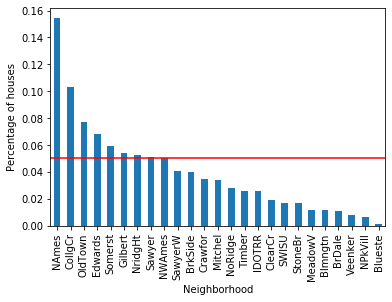

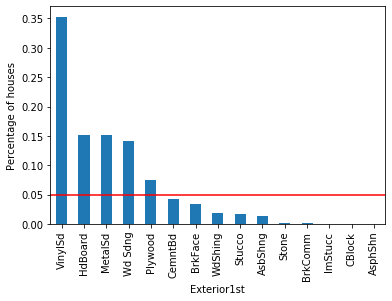

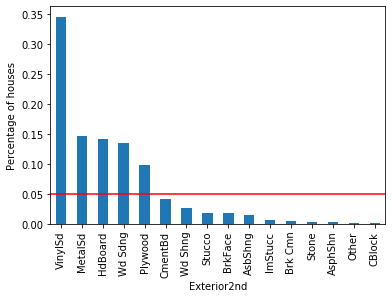

In [4]:
# let's plot how frequently each label
# appears in the dataset

# in other words, the percentage of houses in the data
# with each label

total_houses = len(data)

# for each categorical variable
for col in cat_cols:

    # count the number of houses per category
    # and divide by total houses

    # aka percentage of houses per category

    temp_df = pd.Series(data[col].value_counts() / total_houses)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

For each of the categorical variables, some labels appear in more than 10% of the houses and many appear in less than 10% or even 5% of the houses. These are infrequent labels or **Rare Values** and could cause over-fitting.

### How is the target, "SalePrice", related to these categories?

In the following cells, I want to understand the mean SalePrice per group of houses that display each categories.

Keep on reading, it will become clearer.

In [5]:
# the following function calculates:

# 1) the percentage of houses per category
# 2) the mean SalePrice per category


def calculate_mean_target_per_category(df, var):

    # total number of houses
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

In [6]:
# now we use the function for the variable 'Neighborhood'
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
temp_df

,Neighborhood,perc_houses,SalePrice
0,NAmes,0.154110,145847.080000
1,CollgCr,0.102740,197965.773333
2,OldTown,0.077397,128225.300885
3,Edwards,0.068493,128219.700000
4,Somerst,0.058904,225379.837209
5,Gilbert,0.054110,192854.506329
6,NridgHt,0.052740,316270.623377
7,Sawyer,0.050685,136793.135135
8,NWAmes,0.050000,189050.068493
9,SawyerW,0.040411,186555.796610


The above dataframe contains the percentage of houses that show each one of the labels in Neighborhood, and the mean SalePrice for those group of houses. In other words, ~15% of houses are in NAmes and the mean SalePrice is 145847.

In [7]:
# Now I create a function to plot of the
# category frequency and mean SalePrice.

# This will help us visualise the relationship between the
# target and the labels of the  categorical variable

def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()

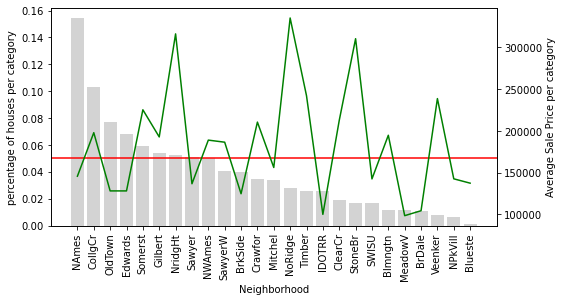

In [8]:
plot_categories(temp_df, 'Neighborhood')

Houses in the 'Neighborhood' of 'NridgHt' sell at a high price, whereas houses in 'Sawyer' tend to be cheaper.

Houses in the 'Neighborhood' of StoneBr have on average a high SalePrice, above 300k. However, StoneBr is present in less than 5% of the houses. Or in other words, less than 5% of the houses in the dataset are located in StoneBr.

Why is this important? Because if we do not have a lot of houses to learn from, we could be under or over-estimating the effect of StoneBr on the SalePrice.

In other words, how confident are we to generalise that most houses in StoneBr will sell for around 300k, when we only have a few houses to learn from?

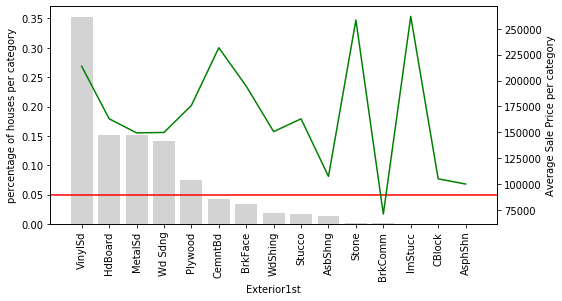

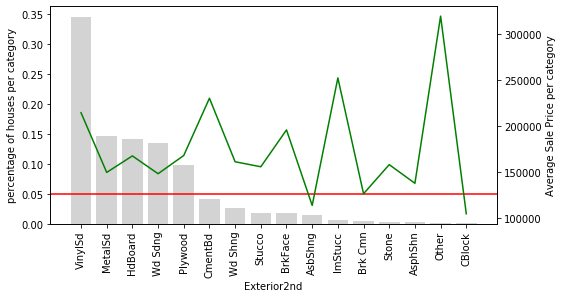

In [8]:
# let's plot the remaining categorical variables

for col in cat_cols:
    
    # we plotted this variable already
    if col !='Neighborhood':
        
        # re using the functions I created
        temp_df = calculate_mean_target_per_category(data, col)
        plot_categories(temp_df, col)

Let's look at variable Exterior2nd: Most of the categories in Exterior2nd are present in less than 5% of houses. In addition, the "SalePrice" varies a lot across those rare categories. The mean value of SalePrice goes up and down over the infrequent categories. In fact, it looks quite noisy. These rare labels could indeed be very predictive, or they could be introducing noise rather than information. And because the labels are under-represented, we can't be sure whether they have a true impact on the house price. We could be under or over-estimating their impact due to the fact that we have information for few houses.

**Note:** This plot would bring more value, if we plotted the errors of the mean SalePrice. It would give us an idea of how much the mean value of the target varies within each label. Why don't you go ahead and add the standard deviation to the plot?

### Rare labels: grouping under a new label

One common way of working with rare or infrequent values, is to group them under an umbrella category called 'Rare' or 'Other'. In this way, we are able to understand the "collective" effect of the infrequent labels on the target. See below.

In [9]:
# I will replace all the labels that appear in less than 5%
# of the houses by the label 'rare'


def group_rare_labels(df, var):

    total_houses = len(df)

    # first I calculate the % of houses for each category
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [11]:
# group rare labels in Neighborhood

data['Neighborhood_grouped'] = group_rare_labels(data, 'Neighborhood')

data[['Neighborhood', 'Neighborhood_grouped']].head(10)

,Neighborhood,Neighborhood_grouped
0,CollgCr,CollgCr
1,Veenker,rare
2,CollgCr,CollgCr
3,Crawfor,rare
4,NoRidge,rare
5,Mitchel,rare
6,Somerst,Somerst
7,NWAmes,NWAmes
8,OldTown,OldTown
9,BrkSide,rare


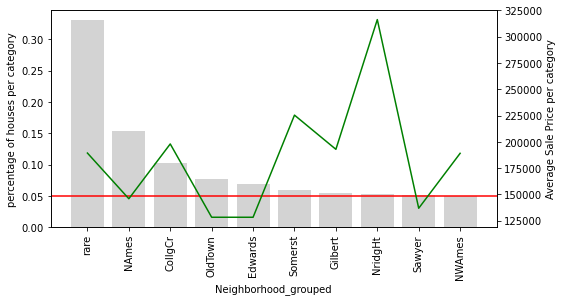

In [12]:
# let's plot Neighborhood with the grouped categories
# re-using the functions I created above

temp_df = calculate_mean_target_per_category(data, 'Neighborhood_grouped')
plot_categories(temp_df, 'Neighborhood_grouped')

"Rare" now contains the overall influence of all the infrequent categories on the SalePrice.

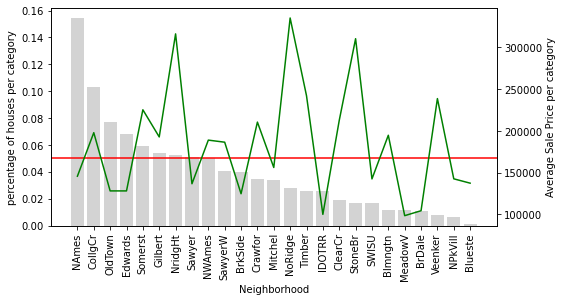

In [13]:
# let's plot the original Neighborhood for comparison
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
plot_categories(temp_df, 'Neighborhood')

Only 9 categories of Neighborhood are relatively common in the dataset. The remaining ones are now grouped into 'rare' which captures the average SalePrice for all the infrequent labels.

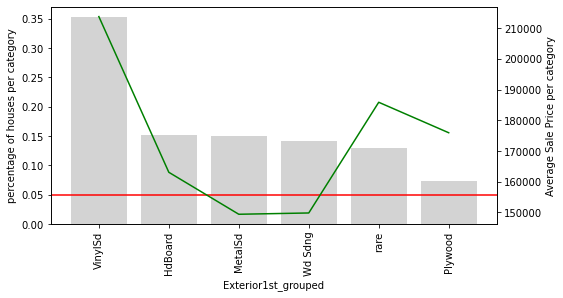

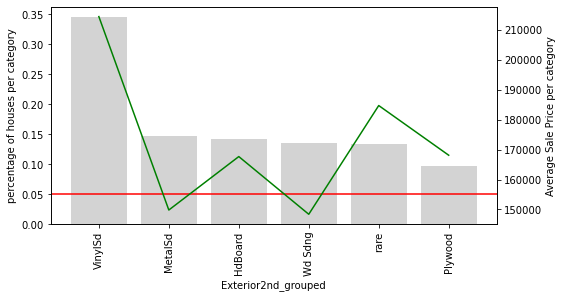

In [14]:
# let's group and plot the remaining categorical variables

for col in cat_cols[1:]:
        
    # re using the functions I created
    data[col+'_grouped'] = group_rare_labels(data, col)
    temp_df = calculate_mean_target_per_category(data, col+'_grouped')
    plot_categories(temp_df, col+'_grouped')

Here is something interesting: In the variable Exterior1st, look at how all the houses with rare values are on average more expensive than the rest, except for those with VinySd.

The same is true for Exterior2nd. The rare categories seem to have had something in common.

**Note:** Ideally, we would also like to have the standard deviation / inter-quantile range for the SalePrice, to get an idea of how variable the house price is for each category.

### Rare labels lead to uneven distribution of categories in train and test sets

Similarly to highly cardinal variables, rare or infrequent labels often land only on the training set, or only on the testing set. If present only in the training set, they may lead to over-fitting. If present only on the testing set, the machine learning algorithm will not know how to handle them, as they have not seen the rare labels during training. Let's explore this further.

In [10]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[cat_cols],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=2910)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [11]:
# Let's find labels present only in the training set
# I will use X2 as example

unique_to_train_set = [
    x for x in X_train['Exterior1st'].unique() if x not in X_test['Exterior1st'].unique()
]

print(unique_to_train_set)

['Stone', 'BrkComm', 'ImStucc', 'CBlock']


There are 4 categories present in the train set and are not present in the test set.

In [12]:
# Let's find labels present only in the test set

unique_to_test_set = [
    x for x in X_test['Exterior1st'].unique() if x not in X_train['Exterior1st'].unique()
]

print(unique_to_test_set)

['AsphShn']


In this case, there is 1 rare value present in the test set only.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**